# Seminar 10. Denoising Diffusion Probabilistic Models

Author: Addisu Amare

### materials

paper_1 - https://arxiv.org/pdf/2006.11239.pdf (DDPM)

paper_2 - https://arxiv.org/pdf/1503.03585.pdf(the first paper of diffusion models)

paper_3 - https://arxiv.org/pdf/2011.13456.pdf (for continuous case)

book_1 - https://www.cmor-faculty.rice.edu/~cox/stoch/SDE.course.pdf thoery of stochastic differential equations (for dummies)

book_2  - https://link.springer.com/book/10.1007/978-1-4939-1323-7 (more general)

## 1. Another view to VAE models

**Questions for the audience**

- What are discriminative models?
- What are generative models?
- What task do generative models solve?

Having defined the main task of generative models, it is logical to ask yourself the question - "How do we actually evaluate the probability of objects from the training sample?"

![title](https://learnopencv.com/wp-content/uploads/2020/10/gen_disc_model-1.jpg)

- The principle of maximum likelihood:

When we want to train a generative model $p(x|\theta)$, then the first attempt to do this is the basis for solving the so-called $\textbf{MLE-problem}$ or the problem of maximizing the likelihood of the model by selecting its parameters:

$$\theta = \arg\max_{\theta} \log p(X|\theta) = \{ X = \{ x_{i}\}_{i=1}^{n}\}= \arg\max_{\theta} \sum_{i=1}^{n} \log p(x_{i}|\theta)$$


**Questions for the audience** Why are we not satisfied with this approach?

- Latent space:

Before we move on to another way of estimating the likelihood of data, we will recall the essence of latent representations. The main intuition of which is shown in the picture below:

![title](https://github.com/r-isachenko/2022-2023-DGM-MIPT-course/blob/main/seminars/seminar3/pics/lvm_diagram.png?raw=true)


- Models of the variation encoder:

Another attempt to assess the likelihood is to introduce latent variables and consider the VAE model.
When we are dealing with a variational autoencoder, we do not have access to an honest value of the logarithm of likelihood, so we optimize the corresponding lower bound, which we call as $\textbf{ELBO}$

$$ \log p(x|\theta) \geq \mathcal{L}(\theta,q) = \int_{Z}q(z|x, \phi)\log\frac{p(x,z|\theta)}{q(z|x,\phi)} dz$$

- Expansion of the latent space: more is better than one

We know that the variational autoencoder has exactly one latent space. That is, we entered the latent space with an encoder and $\bf{immediately}$ leave it with the help of a decoder, while we do not explore the latent space in any way.

However, let's try to expand the number of latent spaces by introducing $T$ consecutive latent spaces with corresponding decompositions of $f_{i}$. That is, we use the encoder to move into the latent space and walk through the latent space for a certain number of steps


![title](https://images.velog.io/images/dbj2000/post/18dec128-e2da-45e0-9594-858e6335bab8/VAE.png)




## 2. Hierarchical  VAE models

For the simplicity, let me denote the follwoing:

- x = $x_{0}$

- $z_{1} = x_{1}$

- $z_{2} = x_{2}$

- $z_{T} = x_{T}$

After introduction more convinient notation for $T$ dimensional vectors, we should define transfromation functions between $f_{i}$ between latent statements. Undoubtedly, one can consider neural networks for this purpose , however, do not worth to complicate our life

$\textbf{Assumption :}$ Let these functions $f_{i}$ are $\textbf{not-learnable}$ certain transfromations. Since we would like to add some stochasticity to the framework, one can consider fixed distributions as such transformations:

$$ q(x_{t}|x_{t_1}) = \mathcal{N}(x_{t}| x_{t-1}, \beta I) $$

Now, our method looks like $\textbf{Brownian motion}$ or $\textbf{Random movements}$.




![title](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/VAE_Basic.png/640px-VAE_Basic.png)


However, if we will learn means of such transformations (normal distributions) , then we obtain method that is referred to as $\textbf{Hierarchical VAE}$. Please, see this $\href{https://jmtomczak.github.io/blog/9/9_hierarchical_lvm_p1.html}{blog}$ for best understanding of this concept

Thus, thanks to this copncept, we realize that one can whole latent spaces $Z = \{ x_{1},...,x_{T}\}$ and then the corresponding $\textbf{ELBO}$ formula is:

$$ \log p(x|\theta) \geq \mathcal{L}(\theta,q) = \int_{Z}q(x_{1},...,x_{T}|x_{0}, \phi)\log\frac{p(x_{0},x_{1},..,x_{T}|\theta)}{q(x_{1},...,x_{T}|x_{0},\phi)} dx_{1:T}$$

## 3. Gaussian diffusion processes

# Question (Motivation):

## 1. What is the main motivation to consider many steps in latent space?
     - answer is here

## 2. What components do lie at the heart of the loss function of VAE?
     - answer is here

![title](https://user-images.githubusercontent.com/15643651/64048117-65e9bb80-cb36-11e9-8564-00aacc8ad4e9.png)

Because the quality of generation of the hierarchical model of the variation encoder is better than the usual one.

**A question to the audience**

- then what conclusion does the number of latent representations suggest?

Then we realize that the more latent spaces we consider, the better and better the quality of the model.

Then the question arises - "But if you take a lot of such latent representations, what will happen?"

And answering this question, let's slightly correct our transitional density of the hierarchical model of the variation encoder:

$$ q(x_t | x_{t-1}) = \mathcal{N}(x_t | x_{t-1}, \beta I) \to q(x_t | x_{t-1}) = \mathcal{N}(x_t | \sqrt{1-\beta}x_{t-1}, \beta I)$$

Then it turns out that such a transient density determines the Markov process (where the present $x_{t}$ depends only on the past $x_{t-1}$):

 $$ x_t = \sqrt{1 - \beta} x_{t-1} + \sqrt{\beta} \epsilon $$

where $ \epsilon$ is usually a standard normal random variable

Thus, our transition process between latent spaces is a Markov process, and here's what's interesting to say about it:

![title](https://static.wikia.nocookie.net/carl-gauss/images/9/9b/Carl_Friedrich_Gauss.jpg/revision/latest?cb=20131217062401)

### Theorem 1:

#### Given:
- $ x_0 \sim \pi(x) $
- $\beta \in (0,1) $

1. Then applying the Markov chain to an arbitrary distribution of $\pi(x)$infinitely many times, we get $\mathcal{N}(0,I)$. Thus, $\mathcal{N}(0,I)$ is a stationary distribution of the chain. That is, the following condition will be fulfilled $ p_\infty(x) = \mathcal{N}(0, I) = \int q(x |x') p_\infty(x') dx' $

2. If we denote $ \overline{\alpha}_t =\prod_{s=1}^{t} (1 - \beta_s) $. Then we can express the sample of the process at any point in time using:

$$ x_t = \sqrt{\overline{\alpha}_t} x_0 + \sqrt{1 - \overline{\alpha}_t} \epsilon $$

$$ q(x_t | x_0) = \mathcal{N}(x_t | \sqrt{\overline{\alpha}_t} x_0, (1 - \overline{\alpha}_t) I) $$

This means that we can select any $x_t$ using only $x_0$.

![ChessUrl](https://learnopencv.com/wp-content/uploads/2023/02/denoising-diffusion-probabilistic-models_forward_process_changing_distribution.png "chess")  

$\textbf{The essence of theorem 1}$

1. The Markov process that we are considering will transform any data distribution into a normal standard distribution in an infinitely long time

2. The process is the so-called $\textbf{free simulation}$, that is, taking any point $x_{0}$ and any point in time $t$, you can instantly find $x_{t}$

We have proved the existence of a stochastic transformation **from data to noise**.

Remember that the diffusion process does not depend on the initial density of $\pi(x)$(complex) and the only requirement is access to a sample from it. The main idea of diffusion models is to use any data distribution of our choice as a complex initial density and gradually noise them. Thus, we understand the **direct diffusion process** as:

$$ x_{0} \sim p_{data}(x) \implies \mathcal{F}(x_{0}) = x_{T} : x_{T} \sim \mathcal{N}(0,I) $$

**The idea:** We have an equation for the direct noise reduction process that looks like this:


$$ dx_t = \sqrt{1 - \beta_t} x_{t-1} + \sqrt{\beta} \epsilon $$

Thanks to this equation, you can construct $\color{red}{\textbf{!! Untrained !!}}$ trajectory **from data to noise**.

If we are dealing with an ordinary differential equation (ODE), then we can run this ODE in reverse time and get trajectories from noise to data. However, our process is not defined by an ODE, but by some kind of complex Stochastic diff equation. And this means that I would like to learn how to unfold such random equations in time.

**Motivation for learning diffusion models**

 - There is a process from data to noise
 - I want to expand the process
 - The detailed process goes from noise to data

Also, one can compare architectures and concepts of another generative models:
    
- VAE
- FLOW-based models
- Diffusion models
- GAN


![ChessUrl](https://avatars.mds.yandex.net/i?id=3634834bc3bcc017e59b06dc757a782e_l-9036873-images-thumbs&n=13 "chess")

## 4. Reverse process

$\textbf{Theoretical statetment:}$ If forward process is represented as set of Gaussian condtional transfromtions $q(x_{t}|x_{t-1})$, then the reverse process will be the same, but with unknown parameters $p{x_{t-1}|x_{t}}$

Thus, we have 2 joint distributions of latent codes:

By the property of Markovian chains, one can represent forward process as:

- $q(x_{1},...,x_{T}|x_{0}) = q( x_{T} | x_{T-1},x_{0}) q(x_{T-1} | x_{T-2},x_{0})...q(x_{2} | x_{1},x_{0})$

By the property of Markovian chains, one can represent reversed process as:

- $p(x_{1},...,x_{T}) = p(x_{T-1}|x_{T})p(x_{T-1}|x_{T})....p(x_{1}|x_{2})$

Now, we pay our attention to the loss function:

$$\int_{x_{1:T}}q(x_{1},...,x_{T}|x_{0})\log\frac{p(x_{0},x_{1},....,x_{T})}{q(x_{1},....,x_{T}|x_{0})}dx_{1: T}$$

Thus, one can represent this loss as corresponding KL-divergenges:

$$ \int_{x_{1:T}} q(x_{1},...,x_{T}|x_{0})\log p(x_{0}|x_{1})dx_{1:T} + \int_{x_{1:T}}q(x_{1},...,x_{T}|x_{0})\log\frac{p(x_{1},....,x_{T})}{q(x_{1},....,x_{T}|x_{0})}dx_{1: T} $$

Now , we should take into account the second term, that it is similar to minimization of KL-divergences, however, we chains in  opposite directions. Then, one can represent forward Markov chains transformation probabilities in opposite direction via $\textbf{Bayes Theorem}$


$\textbf{My desire:}$ i would like to represent the forward markov chain as:

$q(x_{1},...,x_{T}|x_{0}) = q(x_{T}|x_{0})q(x_{T-1}|x_{T},x_{0})q(x_{T-2}|x_{T-1},x_{0})...q(x_{1}|x_{2},x_{0})$

$\textbf{Bayes theorem:}$

$$ q(x_{t-1}|x_{t},x_{0}) = \frac{q(x_{t}|x_{t-1},x_{0})q(x_{t-1}|x_{0})}{q(x_{t}|x_{0})}$$

Clarifications:

- I have Markovian process,hence, there is no dependences on $x_{0} \implies q(x_{t}|x_{t-1},x_{0}) \to q(x_{t}|x_{t-1})  $

- All distributions are gaussian $\implies$ one can perform accurate bayesiam inference



At home, you can substitute corresponding probabilities and get formula for posterior:

$$q(x_{t-1}|x_{t},x_{0}) = \mathcal{N}(x_{t-1}| \hat{\mu}_{t}(x_{t},x_{0}),\hat{\beta_{t}}I)$$

- Mean:

$$\hat{\mu}_{t}(x_{t},x_{0})= \frac{\sqrt{\overline{\alpha}_{t-1}}}{1 - \overline{\alpha_{t}}}\beta x_{0} +\frac{\sqrt{1 - \beta}(1 - \overline{\alpha_{t}} )}{1 - \overline{\alpha_{t}}}x_{t}  $$

- Variance:

$$\hat{\beta_{t}} = \beta_{t}(1 - \overline{\alpha_{t-1}}) \frac{1}{1 - \overline{\alpha}_{t}}$$

## 5. The loss deriavation

Now, we return to ELBO:

$$ \int q(x_{1}|x_{0}) \log p(x_{0}|x_{1})dx_{1} + \int q(x_{T}|x_{0})...q(x_{1}|x_{2},x_{0})\log \frac{p(x_{1}|x_{2})}{q(x_{1}|x_{2},x_{0})}
\frac{p(x_{T-1}|x_{T})}{q(x_{T-1}|x_{T},x_{0})}\frac{....}{....} \frac{p(x_{T})}{q(x_{T}|x_{0})}$$

Then:

$$ - \sum_{t=1}^{T} \mathbb{E}_{x_{1},..,x_{T}} KL(q(x_{t-1}|x_{t},x_{0}) || p(x_{t-1}|x_{t}))) - KL(q(x_{T}|x_{0}||p(x_{T})) + \int q(x_{1}|x_{0}) \log p(x_{0}|x_{1})dx_{1}$$

- If $x_{1} \approx x_{0}$, then const

- As for certain KL in terminate state ?

$\textbf{Idea}$: Minimization of KL divergences

- for simplicity: $p_{\theta}(x_{t-1}|x_{t}) = \mathcal{N}(\mu_{\theta}(x_{t},t),\hat{\beta_{t}}I)$

- Mean matching:


$$ KL(q(x_{t-1}|x_{t},x_{0})|| p_{\theta}(x_{t-1}|x_{t})) = \mathbb{E}_{x_{0},x_{1},...,x_{T},t}\frac{1}{2\hat{\beta_{t}}}|| \hat{\mu}_{t}(x_{t},x_{0}) - \mu_{\theta}(x_{t},t)||_{2}^{2}$$


![ChessUrl]( https://avatars.mds.yandex.net/i?id=f4d7440eda7d238ddfc0b89f1e6f31dfa1f8490d-10547508-images-thumbs&n=13 "chess")


## 6. Re-parameterization like simplification

We would like to approximate $\mu_{\theta}$ by $\hat{\mu_{t}}$, but there is the problem! $\hat{\mu_{t}}(x_{0})$, while trainable mean does not depend on $x_{0}$. As a consequence of that, we cannot converge to 0 this problem:

$\textbf{Re-parametrization:}$


$$\hat{\mu}_{t}(x_{t},x_{0})= \frac{\sqrt{\overline{\alpha}_{t-1}}}{1 - \overline{\alpha_{t}}}\beta x_{0} +\frac{\sqrt{1 - \beta}(1 - \overline{\alpha_{t}} )}{1 - \overline{\alpha_{t}}}x_{t}  $$


$$ \mu_{theta}(x_{t},t) = \frac{\sqrt{\overline{\alpha}_{t-1}}}{1 - \overline{\alpha_{t}}}\beta \color{red}{x_{\theta}(x_{t},t)} +\frac{\sqrt{1 - \beta}(1 - \overline{\alpha_{t}} )}{1 - \overline{\alpha_{t}}}x_{t} $$


- Red term is as estimatiomn for $x_{0}$

Then:

$$\frac{1}{2\hat{\beta}_{t}}||\hat{\mu_{t}}(x_{t},x_{0}) - \mu_{\theta}(x_{t},t)||_{2}^{2}
= \frac{1}{2\hat{\beta}_{t}} || \frac{\sqrt{\overline{\alpha}_{t-1}}}{1-\overline{\alpha_{t}}}\beta (x_{0} - x_{\theta}(x_{t},t))||^{2}_{2}$$

$\textbf{Final reparamterization:}$

$$ x_{t} = \sqrt{\overline{\alpha}_{t}}x_{0} + \sqrt{1 - \overline{\alpha}_{t}}\hat{\epsilon} $$

Then, one can express:

$$x_{0} = \frac{1}{\sqrt{\overline{\alpha_{t}}}}(x_{t} - \sqrt{1 - \overline{\alpha}_{t}}\hat{\epsilon} ) $$

The, one can reparametrize predicted value as:

$$x_{\theta} = \frac{1}{\sqrt{\overline{\alpha_{t}}}}(x_{t} - \sqrt{1 - \overline{\alpha}_{t}} \epsilon_{\theta}(x_{t},t) $$

Thus, the final loss function:

$$ \mathcal{L}(\theta) = \sum_{i=1}^{n}\sum_{t=2}^{T} \frac{\beta^{2}}{2\hat{\beta}_{t}(1-\beta)(1- \overline{\alpha}_{t})} ||  \frac{x^{i}_{t} - \sqrt{\overline{\alpha}}_{t}x_{0}^{i}}{\sqrt{1-\overline{\alpha}}_{t}} - \epsilon_{\theta}(x^{i}_{t},t) ||$$

## 7. Coding part

In [ ]:
import torch
from torch.nn import init
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from sklearn.datasets import make_moons
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### 7.1 models

It is importantly to point out that our neural network will predict $\textbf{noise}$.

Our model is neural network, that has 2 inputs:

- $x_{t}$ data
- $t$ time like condition for more accurate prediction noise of $x_{t}$

It is worth to notice that we have the same model for each step , we do not train new model for each new step. $\color{red}{One\quad model\quad for\quad all\quad steps!}$

Also, You should understand that $t$ is like a value condition and in order to estimate his influence to corresponding noise as a condition , it would be great to create embeddings of the time by corresponding network below.

In [ ]:
class SinusoidalEmbedding(nn.Module):
    def __init__(self, size: int, scale: float = 1.0):
        super().__init__()
        self.size = size
        self.scale = scale

    def forward(self, x: torch.Tensor):
        x = x * self.scale
        half_size = self.size // 2
        emb = torch.log(torch.Tensor([10000.0])) / (half_size - 1)
        emb = torch.exp(-emb * torch.arange(half_size))
        emb = x.unsqueeze(-1) * emb.unsqueeze(0)
        emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=-1)
        return emb

    def __len__(self):
        return self.size

In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self, size: int, type: str, **kwargs):
        super().__init__()

        self.layer = SinusoidalEmbedding(size, **kwargs)

    def forward(self, x: torch.Tensor):
        return self.layer(x)

In [ ]:
class Block(nn.Module):
    def __init__(self, size: int):
        super().__init__()

        self.ff = nn.Linear(size, size)
        self.act = nn.GELU()

    def forward(self, x: torch.Tensor):
        return x + self.act(self.ff(x))


class MLP(nn.Module):
    def __init__(self, hidden_size: int = 128, hidden_layers: int = 3, emb_size: int = 128,
                 time_emb: str = "sinusoidal", input_emb: str = "sinusoidal"):
        super().__init__()

        self.time_mlp = PositionalEmbedding(emb_size, time_emb)
        self.input_mlp1 = PositionalEmbedding(emb_size, input_emb, scale=25.0)
        self.input_mlp2 = PositionalEmbedding(emb_size, input_emb, scale=25.0)

        concat_size = len(self.time_mlp.layer) + \
            len(self.input_mlp1.layer) + len(self.input_mlp2.layer)
        layers = [nn.Linear(concat_size, hidden_size), nn.GELU()]

        for _ in range(hidden_layers):
            layers.append(Block(hidden_size))

        layers.append(nn.Linear(hidden_size, 2))
        self.joint_mlp = nn.Sequential(*layers)

    def forward(self, x, t):
        x1_emb = self.input_mlp1(x[:, 0])
        x2_emb = self.input_mlp2(x[:, 1])
        t_emb = self.time_mlp(t)
        x = torch.cat((x1_emb, x2_emb, t_emb), dim=-1)
        x = self.joint_mlp(x)
        return x

### 7.2 Data

We use simple two moons dataset as data.

In [ ]:
def moons_dataset(n=8000):
    X, _ = make_moons(n_samples=n, random_state=42, noise=0.03)
    X[:, 0] = (X[:, 0] + 0.3) * 2 - 1
    X[:, 1] = (X[:, 1] + 0.3) * 3 - 1
    return TensorDataset(torch.from_numpy(X.astype(np.float32)))

### 7.3 Gaussian Diffusion

This calss is composed of whole formulas from senimar , please familiari`e you with these formulas accurately.

1. reconstruct x0:

$$x_{0} = \frac{1}{\sqrt{\overline{\alpha_{t}}}}(x_{t} - \sqrt{1 - \overline{\alpha}_{t}}\hat{\epsilon} ) $$

2. q posterior:


$$\hat{\mu}_{t}(x_{t},x_{0})= \frac{\sqrt{\overline{\alpha}_{t-1}}}{1 - \overline{\alpha_{t}}}\beta x_{0} +\frac{\sqrt{1 - \beta}(1 - \overline{\alpha_{t}} )}{1 - \overline{\alpha_{t}}}x_{t}  $$

3. get_variance:


$$\hat{\beta_{t}} = \beta_{t}(1 - \overline{\alpha_{t-1}}) \frac{1}{1 - \overline{\alpha}_{t}}$$

4. step:

  -   The sampling moments of time to get $x_{t}$
  -   Make the prediction $x_{0}$
  -   Make the prediction for $x_{t-1}$
  -   Calculate noise
  -   Make one step of the backward process

5. add noise:

  - The expression noise through $x_{0}$ and $x_{t}$
  - $\hat{\epsilon} =  \sqrt{\overline{\alpha_{t}}}\frac{x_{0}}{\sqrt{1 -\overline{\alpha_{t}}  }} - x_{t}\frac{1}{\sqrt{1- \overline{\alpha_{t}}}}$

In [ ]:
class NoiseScheduler():
    def __init__(self,
                 num_timesteps=1000,
                 beta_start=0.0001,
                 beta_end=0.02,
                 beta_schedule="linear"):

        self.num_timesteps = num_timesteps
        if beta_schedule == "linear":
            self.betas = torch.linspace(
                beta_start, beta_end, num_timesteps, dtype=torch.float32)
        elif beta_schedule == "quadratic":
            self.betas = torch.linspace(
                beta_start ** 0.5, beta_end ** 0.5, num_timesteps, dtype=torch.float32) ** 2

        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, axis=0)
        self.alphas_cumprod_prev = F.pad(
            self.alphas_cumprod[:-1], (1, 0), value=1.)

        # required for self.add_noise
        self.sqrt_alphas_cumprod = self.alphas_cumprod ** 0.5
        self.sqrt_one_minus_alphas_cumprod = (1 - self.alphas_cumprod) ** 0.5

        # required for reconstruct_x0
        self.sqrt_inv_alphas_cumprod = torch.sqrt(1 / self.alphas_cumprod)
        self.sqrt_inv_alphas_cumprod_minus_one = torch.sqrt(
            1 / self.alphas_cumprod - 1)

        # required for q_posterior
        self.posterior_mean_coef1 = self.betas * torch.sqrt(self.alphas_cumprod_prev) / (1. - self.alphas_cumprod)
        self.posterior_mean_coef2 = (1. - self.alphas_cumprod_prev) * torch.sqrt(self.alphas) / (1. - self.alphas_cumprod)


    def reconstruct_x0(self, x_t, t, noise):
        s1 = self.sqrt_inv_alphas_cumprod[t]
        s2 = self.sqrt_inv_alphas_cumprod_minus_one[t]
        s1 = s1.reshape(-1, 1)
        s2 = s2.reshape(-1, 1)
        return s1 * x_t - s2 * noise

    def q_posterior(self, x_0, x_t, t):
        s1 = self.posterior_mean_coef1[t]
        s2 = self.posterior_mean_coef2[t]
        s1 = s1.reshape(-1, 1)
        s2 = s2.reshape(-1, 1)
        mu = s1 * x_0 + s2 * x_t
        return mu

    def get_variance(self, t):
        if t == 0:
            return 0

        variance = self.betas[t] * (1. - self.alphas_cumprod_prev[t]) / (1. - self.alphas_cumprod[t])
        variance = variance.clip(1e-20)
        return variance

    def step(self, model_output, timestep, sample):
        t = timestep
        pred_original_sample = self.reconstruct_x0(sample, t, model_output)
        pred_prev_sample = self.q_posterior(pred_original_sample, sample, t)

        variance = 0
        if t > 0:
            noise = torch.randn_like(model_output)
            variance = (self.get_variance(t) ** 0.5) * noise

        pred_prev_sample = pred_prev_sample + variance

        return pred_prev_sample

    def add_noise(self, x_start, x_noise, timesteps):
        s1 = self.sqrt_alphas_cumprod[timesteps]
        s2 = self.sqrt_one_minus_alphas_cumprod[timesteps]

        s1 = s1.reshape(-1, 1)
        s2 = s2.reshape(-1, 1)

        return s1 * x_start + s2 * x_noise

    def __len__(self):
        return self.num_timesteps

### 7.4 Training

We choose hyper parameters for method and run it

In [ ]:
NUM_SAMPLES_DATA = 10_000
BATCH_SIZE=128

HIDDEN_SIZE = 128
HIDDEN_LAYERS=3
EMBEDDING_SIZE = 128
TIME_EMBEDDING="sinusoidal"
INPUT_EMEDDING="sinusoidal"

NUM_TIMESTEPS = 50
BETA_SCHEDULE = 'linear'
LR = 5e-4

NUM_EPOCHS=200

In [ ]:
dataset = moons_dataset(NUM_SAMPLES_DATA)
dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=BATCH_SIZE , shuffle=True, drop_last=True)

model = MLP(
        hidden_size=HIDDEN_SIZE,
        hidden_layers=HIDDEN_LAYERS,
        emb_size=EMBEDDING_SIZE,
        time_emb=TIME_EMBEDDING,
        input_emb=INPUT_EMEDDING)

noise_scheduler = NoiseScheduler(
        num_timesteps=NUM_TIMESTEPS,
        beta_schedule=BETA_SCHEDULE)

optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=LR,
    )

In [ ]:
global_step = 0
frames = []
losses = []

for epoch in tqdm(range(NUM_EPOCHS)):

    model.train()


    for step, batch in enumerate(dataloader):
        batch = batch[0]
        noise = torch.randn(batch.shape)
        timesteps = torch.randint(a
            0, noise_scheduler.num_timesteps, (batch.shape[0],)
        ).long()

        noisy = noise_scheduler.add_noise(batch, noise, timesteps)
        noise_pred = model(noisy, timesteps)
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)

        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.detach().item())



100%|██████████| 200/200 [02:07<00:00,  1.56it/s]


In [ ]:
model.eval()
sample = torch.randn(1024, 2) # sampling from noise
timesteps = list(range(len(noise_scheduler)))[::-1]
for i, t in enumerate(tqdm(timesteps)):
    t = torch.from_numpy(np.repeat(t,  1024)).long()
    with torch.no_grad():
        residual = model(sample, t)
    sample = noise_scheduler.step(residual, t[0], sample)

100%|██████████| 50/50 [00:00<00:00, 104.94it/s]


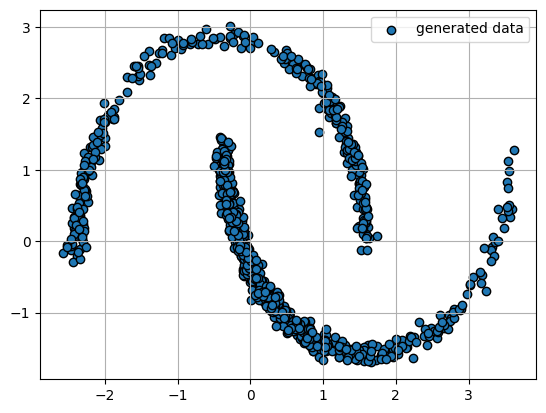

In [ ]:
plt.scatter(sample[:,0],sample[:,1], edgecolor='black', label="generated data")
plt.grid();
plt.legend();

In [ ]:
model.eval()
traj = []
sample = torch.randn(1024, 2) # sampling from noise
timesteps = list(range(len(noise_scheduler)))[::-1]
for i, t in enumerate(tqdm(timesteps)):
    t = torch.from_numpy(np.repeat(t,  1024)).long()
    with torch.no_grad():
        residual = model(sample, t)
    sample = noise_scheduler.step(residual, t[0], sample)
    if t[0].item() % 5 == 0:
        traj.append(sample.cpu())

100%|██████████| 50/50 [00:00<00:00, 118.63it/s]


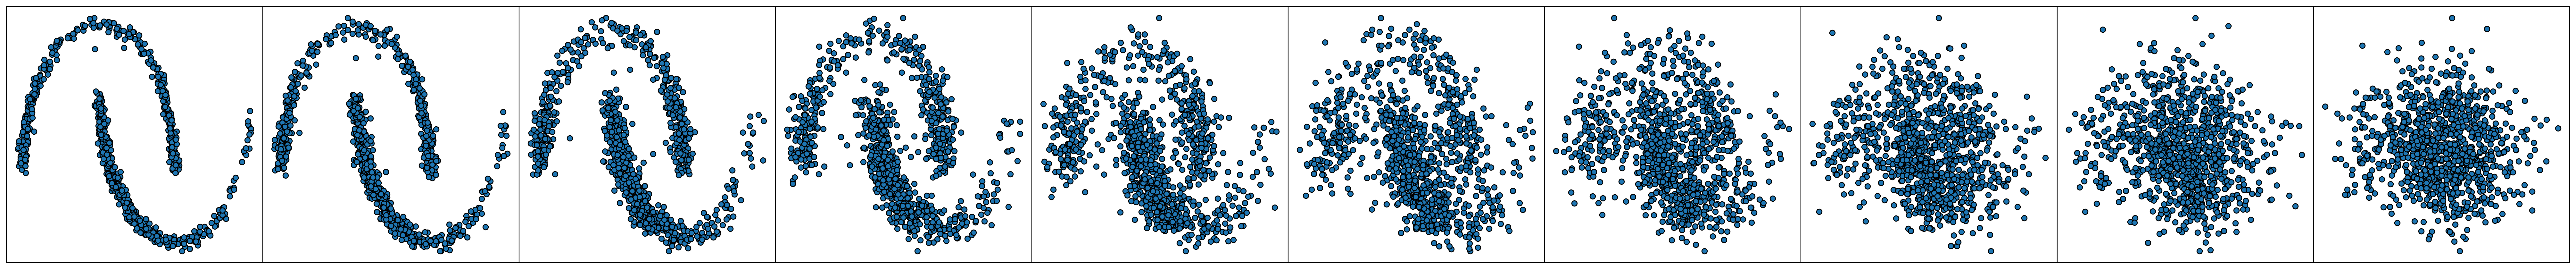

In [ ]:
fig,ax = plt.subplots(1,10,figsize=(40,4),dpi=200)
for idx in range(10):
    ax[idx].scatter(traj[9-idx][:,0],traj[9-idx][:,1],edgecolor='black')
    ax[idx].set_xticks([]);ax[idx].set_yticks([])
    ax[idx].grid();
fig.tight_layout(pad=0.01)

# Output

- We realized that hierarchical VAE models are better than standard ones
- If a deterministic defined transition is applied many times , then any data degrades into noise
- Understood as the basis of the direct process , set the reverse
- Learned the reverse process